# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.367209, W: 0.436806, b: -0.513975
step: 100, loss: 0.321173, W: 0.415615, b: -0.363746
step: 150, loss: 0.285070, W: 0.396850, b: -0.230709
step: 200, loss: 0.256757, W: 0.380232, b: -0.112896
step: 250, loss: 0.234554, W: 0.365516, b: -0.008565
step: 300, loss: 0.217142, W: 0.352484, b: 0.083827
step: 350, loss: 0.203487, W: 0.340943, b: 0.165645
step: 400, loss: 0.192778, W: 0.330723, b: 0.238101
step: 450, loss: 0.184380, W: 0.321673, b: 0.302265
step: 500, loss: 0.177794, W: 0.313658, b: 0.359087
step: 550, loss: 0.172629, W: 0.306560, b: 0.409406
step: 600, loss: 0.168579, W: 0.300275, b: 0.453967
step: 650, loss: 0.165402, W: 0.294709, b: 0.493428
step: 700, loss: 0.162911, W: 0.289779, b: 0.528374
step: 750, loss: 0.160958, W: 0.285414, b: 0.559321
step: 800, loss: 0.159426, W: 0.281549, b: 0.586726
step: 850, loss: 0.158224, W: 0.278125, b: 0.610995
step: 900, loss: 0.157282, W: 0.275094, b: 0.632487
step: 950, loss: 0.156543, W: 0.272409, b: 0.651519
step: 10

In [9]:
import matplotlib.pyplot as plt

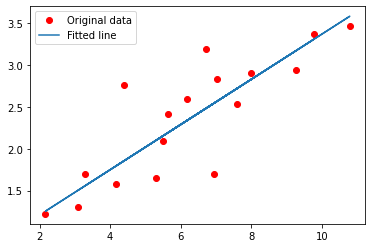

In [10]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()